Text(0.5, 1.0, 'Robert Edge')

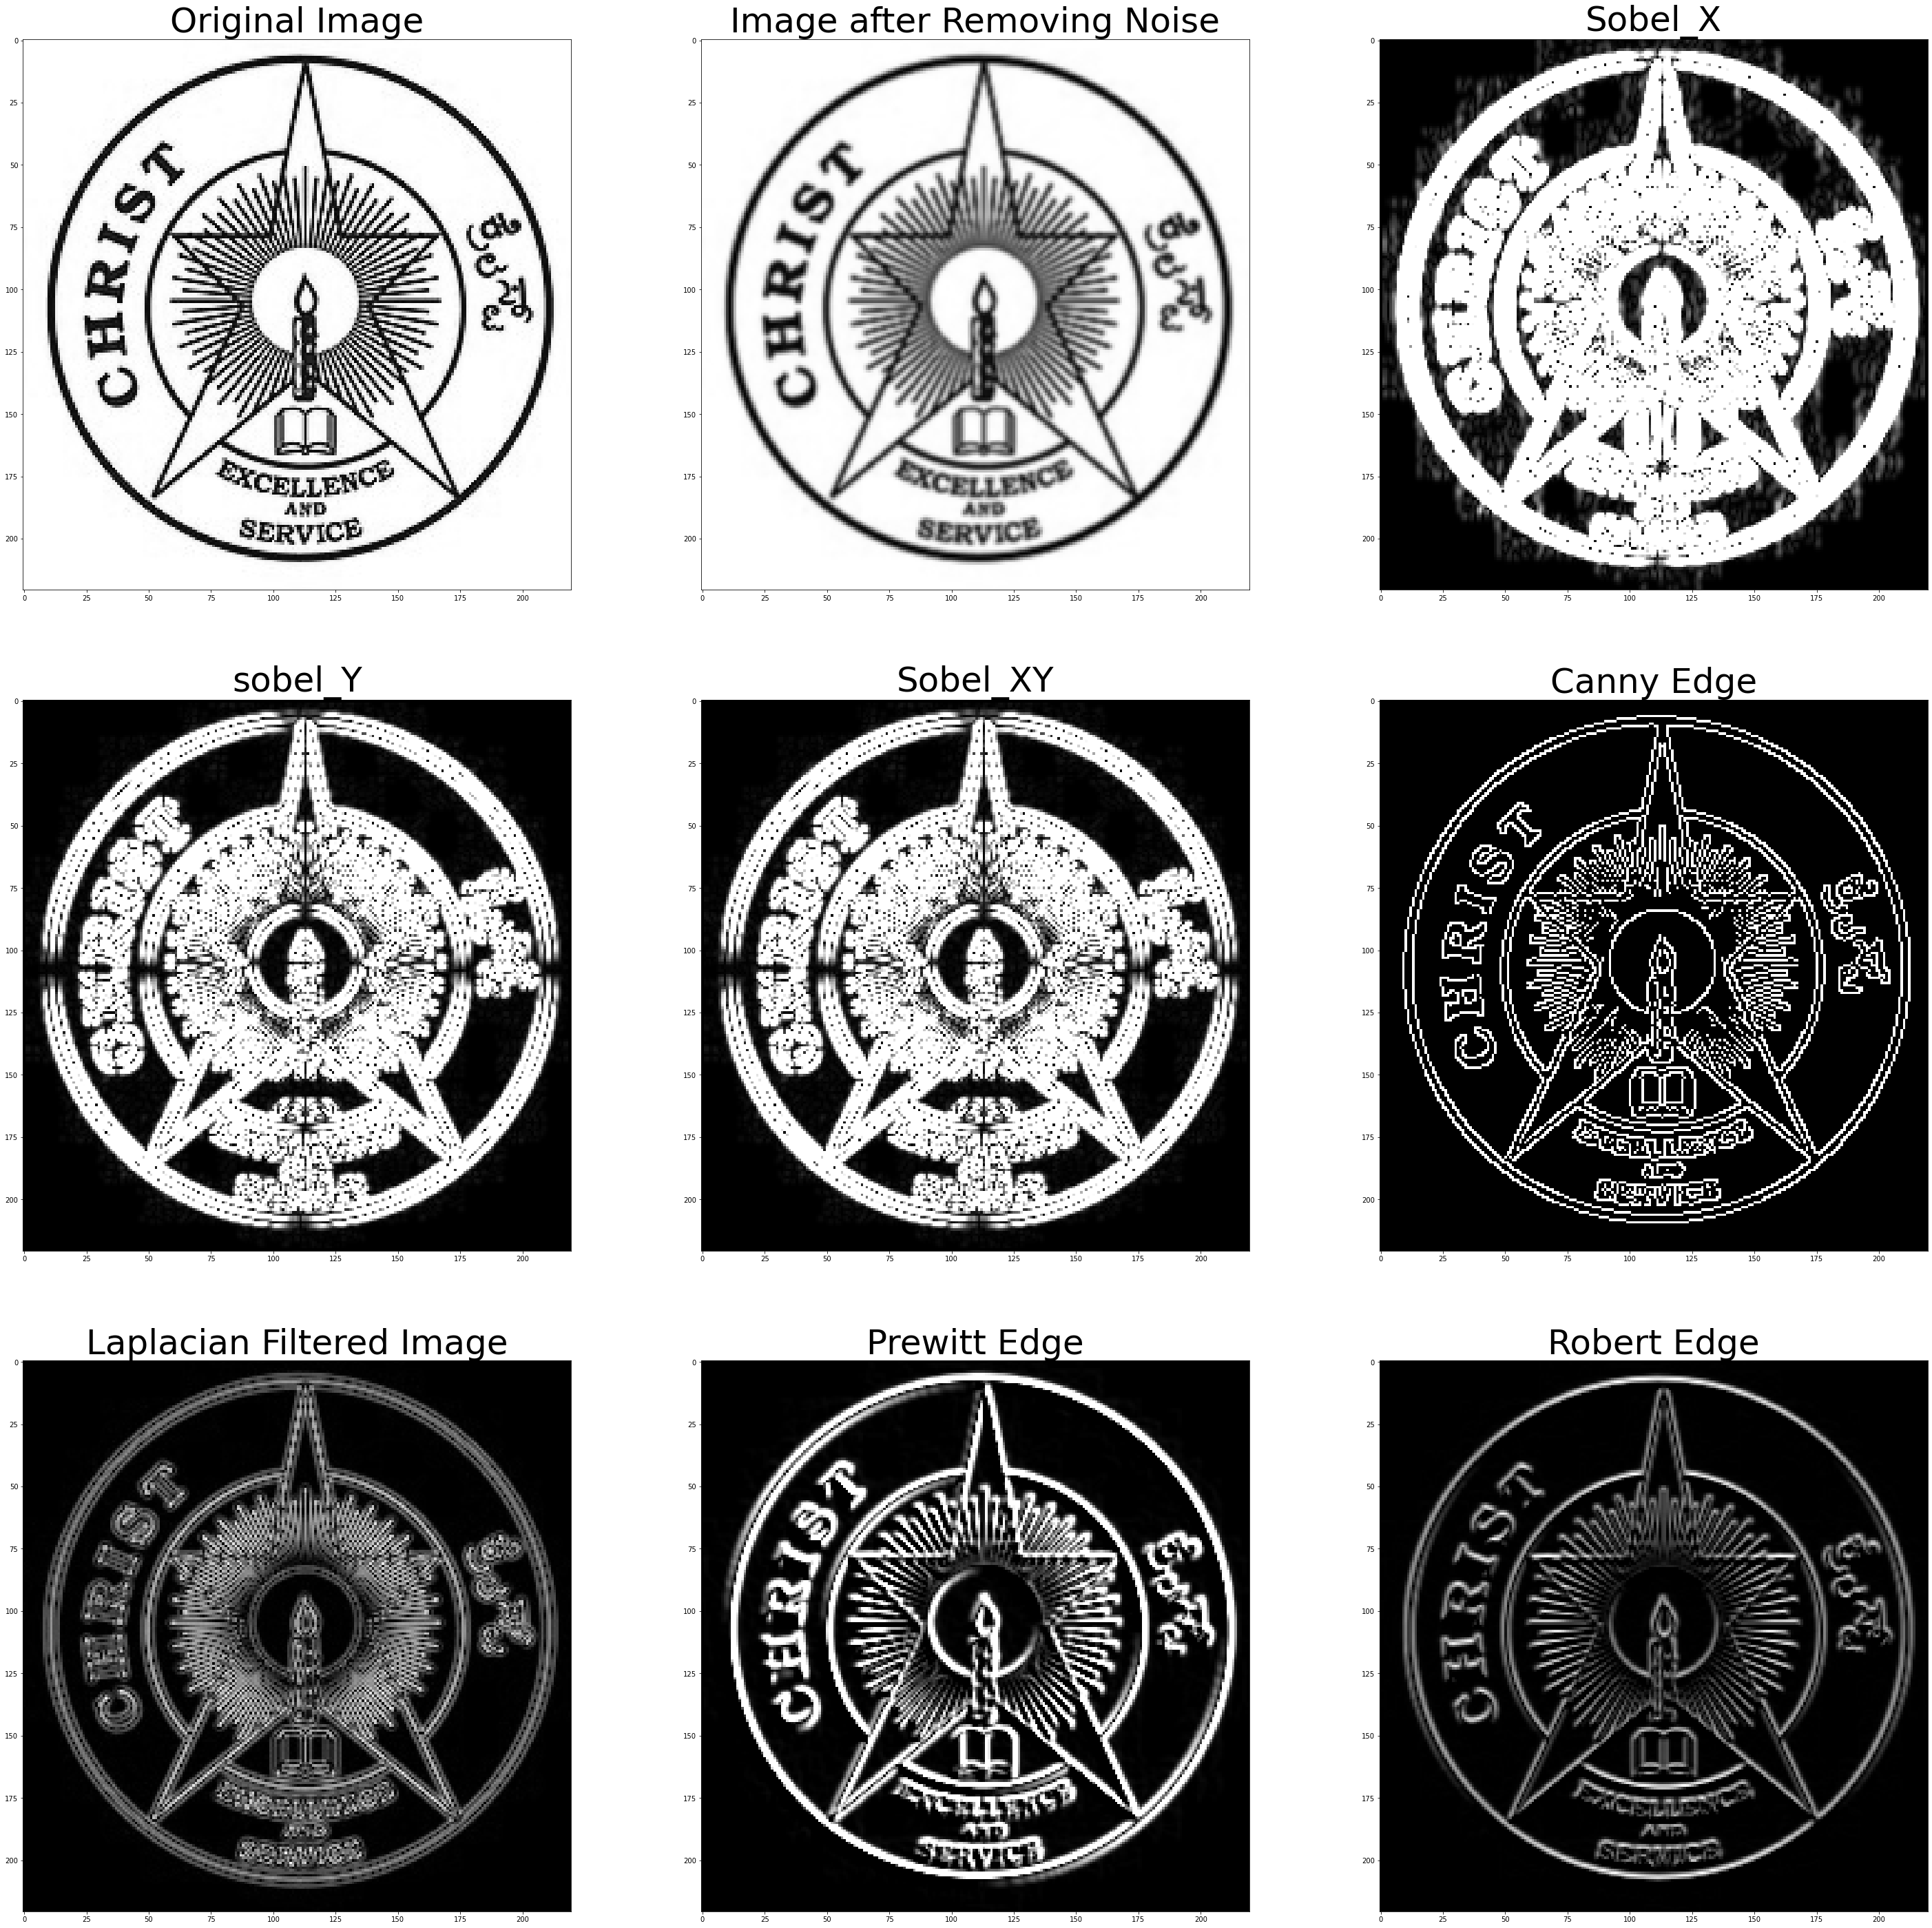

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
original_img = cv2.imread('/content/logo.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)
#Sobel Edge Detection
sobelx = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) #ddepth=-1 / CV_64F,
#the destination image will have the same depth as the source.
filtered_image_x = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
filtered_image_y = cv2.convertScaleAbs(sobely)
sobelxy = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_image_xy = cv2.convertScaleAbs(sobelxy)
 #Canny Edge Detection
#edges = cv2.Canny(img,100,200, aperture_size =3, L2gradient = True ) aperture_size=sobel kerenel size
# L2gradient is gradient magnitude
Cedges = cv2.Canny(image=blur_img, threshold1=100, threshold2=200)
 #Laplacian edge detector
laplacian = cv2.Laplacian(blur_img,5,cv2.CV_64F)
Lfiltered_image = cv2.convertScaleAbs(laplacian) # Covert image back to gray scale
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(blur_img, -1, kernelx)
img_prewitty = cv2.filter2D(blur_img, -1, kernely)
FullPrewitty=cv2.add(img_prewittx, img_prewitty)
#Robert Edge Detection
Rkernelx = np.array([[1, 0], [0, -1]])
Rkernely = np.array([[0, 1], [-1, 0]])
img_robertx = cv2.filter2D(blur_img, -1, Rkernelx)
img_roberty = cv2.filter2D(blur_img, -1, Rkernely)
#cv2.imshow("Prewitt", img_prewittx + img_prewitty)
FullRobert = cv2.add(img_robertx, img_roberty)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(50, 50))
ax[0, 0].imshow(gray, "gray")
ax[0, 0].set_title('Original Image',fontsize = 50)
ax[0, 1].imshow(blur_img, "gray")
ax[0, 1].set_title('Image after Removing Noise',fontsize = 50)
ax[0, 2].imshow(filtered_image_x, "gray")
ax[0, 2].set_title('Sobel_X',fontsize = 50)
ax[1, 0].imshow(filtered_image_xy, "gray")
ax[1, 0].set_title('sobel_Y',fontsize = 50)
ax[1, 1].imshow(filtered_image_xy, "gray")
ax[1, 1].set_title('Sobel_XY',fontsize = 50)
ax[1, 2].imshow(Cedges, "gray")
ax[1, 2].set_title('Canny Edge',fontsize = 50)
ax[2, 0].imshow(Lfiltered_image, "gray")
ax[2, 0].set_title('Laplacian Filtered Image',fontsize = 50)
ax[2, 1].imshow(FullPrewitty, "gray")
ax[2, 1].set_title('Prewitt Edge',fontsize = 50)
ax[2, 2].imshow(FullRobert, "gray")
ax[2, 2].set_title('Robert Edge',fontsize = 50)